In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow as tf
import random

# prepare data

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


In [ ]:
unlabeld_index = np.ones(y_train.shape, np.bool)

N = 20
for i in range(10):
  idx = np.where(y_train == i)[0][:N]
  unlabeld_index[idx] = 0

In [ ]:
x_unlabeld = x_train[np.where(unlabeld_index)[0], ...]

x_train = x_train[np.where(~unlabeld_index)[0], ...]
y_train = y_train[np.where(~unlabeld_index)[0], ...]

In [ ]:
# examples of categorical crossentropy
cce = keras.losses.CategoricalCrossentropy()

# a labeled data from the second class
y_true = [[0, 1, 0, 0]]
y_pred = [[0.05, 0.95, 0, 0]]
print(cce(y_true, y_pred).numpy())

# an ulabeled data
y_true = [[0, 0, 0, 0]]
y_pred = [[0.05, 0.95, 0, 0]]
print(cce(y_true, y_pred).numpy())

# another ulabeled data
y_true = [[0, 0, 0, 0]]
y_pred = [[0.1, 0.4, 0.3, 0.2]]
print(cce(y_true, y_pred).numpy())

0.051293306
0.0
0.0


In [ ]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# from keras.callbacks import EarlyStopping
# es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)

In [ ]:
# define model
regularizer=keras.regularizers.l2(1e-3)
input = keras.layers.Input(shape=x_train[0].shape)

c1 = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizer)(input)
c2 = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizer)(c1)
m1 = keras.layers.MaxPooling2D()(c2)
c3 = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizer)(m1)
c4 = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizer)(c3)
m2 = keras.layers.MaxPooling2D()(c4)
f = keras.layers.Flatten(input_shape=x_train[0].shape)(m2)
dropout = keras.layers.Dropout(0.5)(f)
d1 = keras.layers.Dense(units=512, activation='relu', kernel_regularizer=regularizer)(dropout)
output = keras.layers.Dense(units=num_classes, activation='softmax', kernel_regularizer=regularizer)(d1)

model = keras.Model(input, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0     

In [ ]:
# compile model

optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    
                    )

Epoch 1/10
4/4 [==============================] - 18s 4s/step - loss: 7.3380 - accuracy: 0.0826 - val_loss: 30.2032 - val_accuracy: 0.0967
Epoch 2/10
4/4 [==============================] - 12s 4s/step - loss: 18.9242 - accuracy: 0.1105 - val_loss: 5.4370 - val_accuracy: 0.1042
Epoch 3/10
4/4 [==============================] - 12s 4s/step - loss: 5.0539 - accuracy: 0.1313 - val_loss: 3.5110 - val_accuracy: 0.1295
Epoch 4/10
4/4 [==============================] - 12s 4s/step - loss: 3.4775 - accuracy: 0.1153 - val_loss: 3.3994 - val_accuracy: 0.1100
Epoch 5/10
4/4 [==============================] - 12s 4s/step - loss: 3.4043 - accuracy: 0.0847 - val_loss: 3.3277 - val_accuracy: 0.1198
Epoch 6/10
4/4 [==============================] - 12s 4s/step - loss: 3.3120 - accuracy: 0.1173 - val_loss: 3.3156 - val_accuracy: 0.1212
Epoch 7/10
4/4 [==============================] - 12s 4s/step - loss: 3.3036 - accuracy: 0.1374 - val_loss: 3.3079 - val_accuracy: 0.1355
Epoch 8/10
4/4 [================

In [ ]:
new_x_train = []
new_y_train = []
for i in range(len(x_unlabeld)):
  
  new_x_train.append(x_unlabeld[i])
  new_y_train.append(0)
  rot90 = tf.image.rot90(x_unlabeld[i])
  new_x_train.append(rot90)
  new_y_train.append(1)
  rot180 = tf.image.rot90(x_unlabeld[i], k=2)
  new_x_train.append(rot180)
  new_y_train.append(2)
  rot270 = tf.image.rot90(x_unlabeld[i], k=3)
  new_x_train.append(rot270)
  new_y_train.append(3)

In [ ]:
new_x_train = np.asarray(new_x_train)
new_y_train = np.asarray(new_y_train)
print(new_x_train.shape)
print(new_y_train.shape)

(199200, 32, 32, 3)
(199200,)


In [ ]:
# Convert class vectors to binary class matrices.

new_y_train = keras.utils.to_categorical(new_y_train, 4)


In [ ]:
# define model
regularizer=keras.regularizers.l2(1e-3)
input = keras.layers.Input(shape=new_x_train[0].shape)

c1 = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(input)
c2 = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(c1)
m1 = keras.layers.MaxPooling2D()(c2)
c3 = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(m1)
c4 = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(c3)
m2 = keras.layers.MaxPooling2D()(c4)
f = keras.layers.Flatten(input_shape=x_train[0].shape)(m2)
dropout = keras.layers.Dropout(0.5)(f)
d1 = keras.layers.Dense(units=512, activation='elu', kernel_regularizer=regularizer)(dropout)
output = keras.layers.Dense(units=4, activation='softmax')(d1)

rotation_model = keras.Model(input, output)
rotation_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0   

In [ ]:
 # compile model
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
loss = keras.losses.CategoricalCrossentropy(from_logits=True)
rotation_model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# train model
history_rotation = rotation_model.fit(new_x_train, new_y_train,
                    batch_size=256,
                    epochs=10,
                    shuffle=True,
                    validation_split = 0.2,

                    )

Epoch 1/10
623/623 [==============================] - 19s 30ms/step - loss: 6.2002 - accuracy: 0.3531 - val_loss: 1.9629 - val_accuracy: 0.5883
Epoch 2/10
623/623 [==============================] - 18s 29ms/step - loss: 1.8991 - accuracy: 0.5781 - val_loss: 1.5515 - val_accuracy: 0.6630
Epoch 3/10
623/623 [==============================] - 18s 29ms/step - loss: 1.5502 - accuracy: 0.6303 - val_loss: 1.3239 - val_accuracy: 0.6842
Epoch 4/10
623/623 [==============================] - 18s 29ms/step - loss: 1.3244 - accuracy: 0.6671 - val_loss: 1.1729 - val_accuracy: 0.6978
Epoch 5/10
623/623 [==============================] - 18s 29ms/step - loss: 1.1764 - accuracy: 0.6879 - val_loss: 1.0489 - val_accuracy: 0.7302
Epoch 6/10
623/623 [==============================] - 18s 29ms/step - loss: 1.0662 - accuracy: 0.7094 - val_loss: 0.9964 - val_accuracy: 0.7243
Epoch 7/10
623/623 [==============================] - 18s 30ms/step - loss: 0.9949 - accuracy: 0.7253 - val_loss: 0.9667 - val_accuracy:

In [ ]:
# rotation_model.summary()
# rotation_model.layers.pop()
# ratate_model.layers.pop()
# rotation_model.summary()



In [ ]:
output_clf = keras.layers.Dense(units=num_classes, activation='softmax')(rotation_model.layers[-2].output)
clf_model = keras.Model(input, output_clf)
clf_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0   

In [ ]:
# output_clf = keras.layers.Dense(units=num_classes, activation='softmax')(d1)

# clf_model = keras.Model(input, output_clf)
# clf_model.summary()

In [ ]:
 # compile model
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
clf_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


# train model
history_clf = clf_model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    
                    )

Epoch 1/10
4/4 [==============================] - 2s 333ms/step - loss: 4.0750 - accuracy: 0.1069 - val_loss: 3.0331 - val_accuracy: 0.2023
Epoch 2/10
4/4 [==============================] - 1s 259ms/step - loss: 2.3816 - accuracy: 0.2854 - val_loss: 2.3809 - val_accuracy: 0.2854
Epoch 3/10
4/4 [==============================] - 1s 275ms/step - loss: 1.7553 - accuracy: 0.4555 - val_loss: 2.3181 - val_accuracy: 0.3880
Epoch 4/10
4/4 [==============================] - 1s 241ms/step - loss: 0.9936 - accuracy: 0.7465 - val_loss: 2.3167 - val_accuracy: 0.3899
Epoch 5/10
4/4 [==============================] - 1s 237ms/step - loss: 0.7855 - accuracy: 0.8310 - val_loss: 2.9756 - val_accuracy: 0.3867
Epoch 6/10
4/4 [==============================] - 1s 236ms/step - loss: 0.6198 - accuracy: 0.8755 - val_loss: 2.7685 - val_accuracy: 0.4569
Epoch 7/10
4/4 [==============================] - 1s 235ms/step - loss: 0.3912 - accuracy: 0.9765 - val_loss: 3.3861 - val_accuracy: 0.4351
Epoch 8/10
4/4 [====

In [ ]:
# zeros4 = np.zeros((4,), dtype=np.float32)
# zeros10 = np.zeros((10,), dtype=np.float32)
zeros10 = np.zeros((10,))
zeros10

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
new_x_train = []
new_y_train = []
for i in range(len(x_unlabeld)):
  # k = np.random.randint(4, size=1)[0]
  # if k == 0:
  new_x_train.append(x_unlabeld[i])
  new_y_train.append(0)
  # else:
  rot = tf.image.rot90(x_unlabeld[i], k=1)
  new_x_train.append(rot)
  new_y_train.append(1)
  rot180 = tf.image.rot90(x_unlabeld[i], k=2)
  new_x_train.append(rot180)
  new_y_train.append(2)
  rot270 = tf.image.rot90(x_unlabeld[i], k=3)
  new_x_train.append(rot270)
  new_y_train.append(3)

In [ ]:
temp = list(zip(new_x_train, new_y_train))
random.shuffle(temp)
new_x_train, new_y_train = zip(*temp)

In [ ]:
new_x_train = np.asarray(new_x_train)
new_y_train = np.asarray(new_y_train)
print(new_x_train.shape)
print(new_y_train.shape)

(199200, 32, 32, 3)
(199200,)


In [ ]:
# Convert class vectors to binary class matrices.

new_y_train = keras.utils.to_categorical(new_y_train, 4)


In [ ]:
x_train_rotated = []
y_train_rotated = []
y_train_unrotated = []
for i in range(len(x_train)):
  # k = np.random.randint(4, size=1)[0]
  # if k==0:
  x_train_rotated.append(x_train[i])
  y_train_rotated.append(0)
  y_train_unrotated.append(y_train[i])
# else:
  rot = tf.image.rot90(x_train[i], k=1)
  x_train_rotated.append(rot)
  y_train_rotated.append(1)
  y_train_unrotated.append(y_train[i])
  rot180 = tf.image.rot90(x_train[i], k=2)
  x_train_rotated.append(rot180)
  y_train_rotated.append(2)
  y_train_unrotated.append(y_train[i])
  rot270 = tf.image.rot90(x_train[i], k=3)
  x_train_rotated.append(rot270)
  y_train_rotated.append(3)
  y_train_unrotated.append(y_train[i])

In [ ]:
temp = list(zip(x_train_rotated, y_train_rotated, y_train_unrotated))
random.shuffle(temp)
x_train_rotated, y_train_rotated, y_train_unrotated = zip(*temp)

In [ ]:
# Convert class vectors to binary class matrices.

y_train_rotated = keras.utils.to_categorical(y_train_rotated, 4)


In [ ]:
x_train_rotated = np.asarray(x_train_rotated)
y_train_rotated = np.asarray(y_train_rotated)
y_train_unrotated = np.asarray(y_train_unrotated)
print(x_train_rotated.shape)
print(y_train_rotated.shape)
print(y_train_unrotated.shape)

(800, 32, 32, 3)
(800, 4)
(800, 10)


In [ ]:
y_train_rotated[-1]

array([1., 0., 0., 0.], dtype=float32)

In [ ]:
multi_x_train = []
multi_y1_train = []
multi_y2_train = []
for i in range(len(new_x_train)):
    multi_x_train.append(new_x_train[i])
    multi_y1_train.append(zeros10)
    multi_y2_train.append(new_y_train[i])
    
for i in range(len(x_train_rotated)):
    multi_x_train.append(x_train_rotated[i])
    multi_y1_train.append(y_train_unrotated[i])
    multi_y2_train.append(y_train_rotated[i])

In [ ]:
multi_x_train = np.asarray(multi_x_train)
multi_y1_train = np.asarray(multi_y1_train, dtype=np.float32)
multi_y2_train = np.asarray(multi_y2_train, dtype=np.float32)
print(multi_x_train.shape)
print(multi_y1_train.shape)
print(multi_y2_train.shape)

(200000, 32, 32, 3)
(200000, 10)
(200000, 4)


In [ ]:
# define model
regularizer=keras.regularizers.l2(1e-3)
inputs = keras.layers.Input(shape=multi_x_train[0].shape)
 
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(inputs)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(x)
x = keras.layers.MaxPooling2D()(x)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', kernel_regularizer=regularizer)(x)
x = keras.layers.MaxPooling2D()(x)
x = keras.layers.Flatten(input_shape=x_train[0].shape)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(units=512, activation='elu', kernel_regularizer=regularizer)(x)
output1 = keras.layers.Dense(units=10, activation='softmax', name='classification_output')(x)
output2 = keras.layers.Dense(units=4, activation='softmax', name='rotation_output')(x)
 
model = keras.Model(
            inputs=inputs,
            outputs=[output1, output2],
            
            )

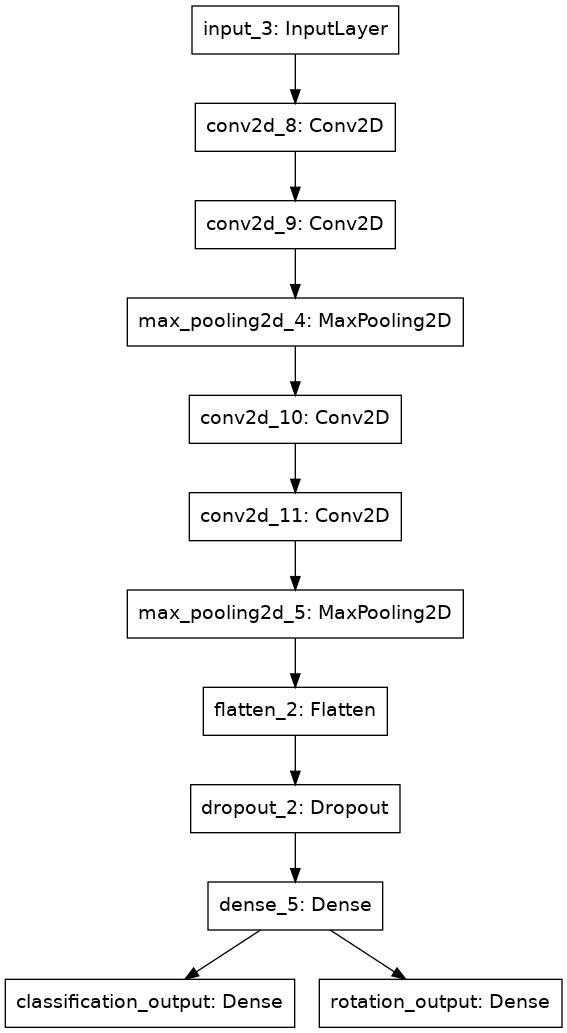

In [ ]:
# from IPython.display import SVG
 
# SVG(tf.keras.utils.model_to_dot(model,show_shapes= True, show_layer_names=True, dpi=60).create(prog='dot', format='svg'))
keras.utils.plot_model(
    model
)

In [ ]:
losses = {
    "classification_output": "categorical_crossentropy",
    "rotation_output": "categorical_crossentropy",
}
lossWeights = {"classification_output": 0.00001, "rotation_output": 1.0}
init_lr = 1e-3
# initial_learning_rate = 1e-3
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=10000,
#     decay_rate=0.95,
#     staircase=True)
epochs = 10
opt = keras.optimizers.Adam(learning_rate=init_lr)
model.compile(optimizer=opt, loss=losses, loss_weights=lossWeights,
    metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
zeros4 = np.zeros((4,), dtype=np.float32)
y_test_rotate = [zeros4 for _ in range(len(y_test))]
y_test_rotate = np.asarray(y_test_rotate)

In [ ]:
H = model.fit(x=multi_x_train,
    y={"classification_output": multi_y1_train, "rotation_output": multi_y2_train},
    validation_data=(x_test,
        {"classification_output": y_test, "rotation_output": y_test_rotate}),
    # validation_split=0.2,
    batch_size=256,
    epochs=epochs,
    # verbose=2      
    )

Epoch 1/10
782/782 [==============================] - 23s 29ms/step - loss: 4.7741 - classification_output_loss: 0.0111 - rotation_output_loss: 3.5788 - classification_output_categorical_accuracy: 0.1065 - rotation_output_categorical_accuracy: 0.3513 - val_loss: 0.8331 - val_classification_output_loss: 2.4212 - val_rotation_output_loss: 0.0000e+00 - val_classification_output_categorical_accuracy: 0.1122 - val_rotation_output_categorical_accuracy: 0.5625
Epoch 2/10
782/782 [==============================] - 22s 28ms/step - loss: 1.7272 - classification_output_loss: 0.0105 - rotation_output_loss: 0.9834 - classification_output_categorical_accuracy: 0.2389 - rotation_output_categorical_accuracy: 0.5848 - val_loss: 0.5320 - val_classification_output_loss: 2.5520 - val_rotation_output_loss: 0.0000e+00 - val_classification_output_categorical_accuracy: 0.1195 - val_rotation_output_categorical_accuracy: 0.6117
Epoch 3/10
782/782 [==============================] - 22s 28ms/step - loss: 1.3501 -

In [ ]:
model.evaluate(x=x_test,y={"classification_output":y_test, "rotation_output":y_test_rotate})

313/313 [==============================] - 1s 4ms/step - loss: 0.2461 - classification_output_loss: 3.6523 - rotation_output_loss: 0.0000e+00 - classification_output_categorical_accuracy: 0.1125 - rotation_output_categorical_accuracy: 0.6760


[0.24613630771636963,
 3.652289867401123,
 0.0,
 0.11249999701976776,
 0.6759999990463257]